In [63]:
import igraph as ig
import random
random.seed(1234)

In [64]:
n = 100
m = 200
g = ig.Graph.Erdos_Renyi(n=n, m=m)


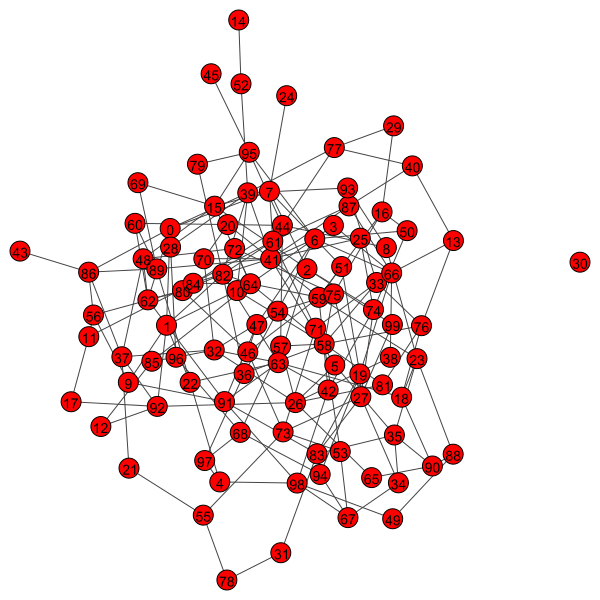

In [65]:

ig.plot(g,
        vertex_size=20,
        vertex_label=list(range(n)),
        )


In [66]:
print("adjacency matrix \n", g.get_adjacency()[0:12, 0:12])
print("adjacency list \n", g.get_adjlist()[0:12])


adjacency matrix 
 [[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
adjacency list 
 [[1, 7, 39, 62, 86], [0, 9, 10, 22, 82, 92], [7, 15, 63, 74, 99], [64, 66], [22, 97, 98], [26, 35, 41], [41, 47, 50, 54, 66, 95], [0, 2, 15, 24, 51, 61], [23, 44, 93], [1, 56, 91], [1, 39, 58, 64], [17, 56, 84]]


In [72]:
# connected components algorithm from https://cppsecrets.com/users/5629115104105118971091101011031055657495564103109971051084699111109/Python-Connected-Components-in-Graph.php

visited = [False for i in range(n+1)]
all_components = []
graph = g.get_adjlist()
def dfs(node, component):
    # marking node as visited.
    visited[node] = True

    # appending node in the component list
    component.append(node)
    # visiting neighbours of the current node
    for neighbour in graph[node]:
        # if the node is not visited then we call dfs on that node.
        if visited[neighbour] == False:
            dfs(neighbour, component)


for i in range(n):
    if visited[i] == False:
        component = []
        dfs(i, component)
        all_components.append(component)

print(len(all_components), all_components)
print(g.components())
print(set(all_components[0]) == set(g.components()[0]))
print(set(all_components[1]) == set(g.components()[1]))

2 [[0, 1, 9, 56, 11, 17, 92, 12, 85, 64, 3, 66, 6, 41, 5, 26, 32, 37, 21, 55, 73, 27, 19, 51, 7, 2, 15, 48, 62, 60, 20, 44, 8, 23, 18, 63, 22, 4, 97, 36, 54, 75, 16, 29, 77, 39, 10, 58, 33, 71, 61, 82, 79, 95, 45, 80, 46, 47, 91, 83, 31, 78, 35, 34, 67, 53, 94, 68, 57, 96, 28, 98, 42, 59, 74, 25, 50, 49, 88, 90, 65, 84, 87, 40, 13, 76, 81, 93, 52, 14, 72, 89, 69, 86, 43, 70, 99, 24, 38], [30]]
Clustering with 100 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39,
    40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
    58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
    94, 95, 96, 97, 98, 99
[1] 30
True
True


In [76]:
def bfs(graph, start, end):
    # maintain a queue of paths
    queue = []
    # push the first path into the queue
    queue.append([start])
    while queue:
        # get the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        # path found
        if node == end:
            return path
        # enumerate all adjacent nodes, construct a 
        # new path and push it into the queue
        if graph[node]:
            for adjacent in graph[node]:
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        else:
            new_path = list(path)
            new_path.append([])
            queue.append(new_path)

print("custom implementation using bfs", bfs(graph, 43, 13))
print("igraph shortest path implementation", g.get_shortest_paths(43, 13))

custom implementation using bfs [43, 86, 0, 39, 77, 40, 13]
igraph shortest path implementation [[43, 86, 0, 39, 77, 40, 13]]
